# RNA-Seq Data PCA
## ToC
1. Import Library and Modules
2. Define your original Config-Variables, and functions
3. Write your logic code

In [2]:
# Import Library
from functools import reduce

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
# Set Config
CONFIG = {
  "data_dir": "./Salmon2",
  "info_name": "sampleinfo2.txt",
  "col_name": "Condition",
  "max_threshold": 0.2,
  "mean_threshold": 0.1
}

In [4]:
# Load Data
data_info = pd.read_csv(f"{CONFIG['data_dir']}/{CONFIG['info_name']}", sep='\t')

dfile = [f"{CONFIG['data_dir']}/{d}/quant.genes.sf" for d in data_info['sample']]
raw_data = [pd.read_csv(fname, sep='\t')[['Name', 'TPM']] for fname in dfile]

In [5]:
# Shape Data
def pre_TPM(data:pd.DataFrame):
  data.TPM = np.log2(data.TPM +1)
  return data


data = reduce(lambda df1, df2: pd.merge(df1, df2, on='Name'), [pre_TPM(i) for i in raw_data])

data.index = data.Name.values
data.drop('Name', axis=1, inplace=True)
data.columns = data_info[CONFIG['col_name']].values

_data = data.T.copy()

data.drop(data[data.max(axis=1)<=CONFIG['max_threshold']].index, inplace=True)
data.drop(data[data.mean(axis=1)<=CONFIG['mean_threshold']].index, inplace=True)

data = data.T

In [6]:
data

,MT-ND6,MT-ND5,MT-ND4L,MT-CO3,MT-ATP8,MT-CO2,MT-CO1,MT-ND2,MT-ND1,MT-RNR2,...,ENST00000427630.1,NANOGP8,ZNF626,DUTP6,PIAS3,PSEN2,ENST00000671241.1,ENST00000466557.6,PSMD6,ENST00000642139.1
U87,8.943520,10.410377,13.512247,13.398156,14.623133,13.469413,13.006906,11.946109,11.681089,10.806912,...,0.389658,0.000000,0.017252,0.000000,4.629193,4.446693,1.210557,0.000000,7.651310,0.085625
U87,8.098195,10.332249,13.418933,13.487312,14.430766,13.488192,13.057069,11.844117,11.469016,10.773988,...,0.000000,0.140356,0.000000,0.000000,4.788889,4.793313,1.103209,0.000000,7.578584,0.139223
U251,8.908948,10.243436,13.239163,12.976244,14.186981,12.981157,12.893973,11.299929,10.755981,11.164586,...,0.000000,0.000000,0.519570,0.000000,4.679469,3.240568,0.363288,0.000000,7.762309,0.172648
U251,8.625205,10.179113,12.991274,12.861000,14.098846,12.887160,12.800061,11.244780,10.837423,10.946066,...,0.000000,0.160217,0.865726,0.253890,4.366091,3.407702,0.351035,0.000000,7.742970,0.108432
hG008,9.102551,10.676839,13.556027,12.931199,14.138368,13.247930,12.489304,11.745637,11.230291,12.641718,...,0.336520,0.118267,2.618015,1.761183,4.415502,1.661877,0.000000,0.184745,6.707304,0.221684
hG008,7.872047,10.188898,13.032270,12.778395,13.881754,13.166852,12.593001,11.101070,9.811712,12.155049,...,0.000000,0.000000,2.473623,1.607229,3.922036,2.004127,0.000000,0.376682,6.568091,0.143403
hG020,8.891923,9.409915,13.073618,13.193086,14.139415,13.091591,12.089887,11.670718,10.829628,11.976657,...,0.000000,0.361640,3.226199,1.432639,4.985705,4.006038,0.031068,0.166665,6.586784,0.288015
hG020,8.997236,10.328125,14.020746,14.165676,15.075613,14.056672,13.070931,12.486991,11.637879,12.728745,...,0.479381,0.194386,3.248717,1.387418,5.036007,3.570827,0.000000,0.360274,6.417118,0.085248
SF126,7.965513,10.207393,12.808677,12.840306,13.563947,12.785107,12.814230,11.590386,11.107609,10.843591,...,1.481423,0.259432,0.011530,1.062225,6.334393,4.341274,2.397086,0.217530,6.748515,0.134825


## PCAの実行
---
**TL;DR**: ここではPCAを実行し, Seqのデータの状態空間について視覚的に分析します

### Hyphothesi
まんじなのでよくわからないのでがんばる

### Method
1. がんばる
2. がんばれなかったらがんばる


In [7]:
model = PCA(random_state=0)

In [8]:
model.fit(data)

PCA(random_state=0)

In [9]:
pd.DataFrame(model.transform(data), index=data.index, columns=[f"PCA{i}"for i in range(1, 10)])

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
U87,114.403020,-26.513221,23.052570,-50.419701,1.941631,-1.685162,-0.507210,-28.981965,5.825136e-14
U87,113.936675,-27.731675,21.610572,-47.519570,-1.479323,0.364045,-1.198408,29.752327,6.049024e-14
U251,54.516981,93.438442,-34.258156,21.077625,2.074111,-5.839011,-30.136770,-0.201451,5.467848e-14
U251,57.425955,95.822444,-30.926091,14.620227,-2.796778,5.833108,30.422557,0.045968,7.049916e-14
hG008,-110.249561,19.278181,74.622269,6.010843,39.235583,5.055871,0.945505,1.231781,4.703182e-14
hG008,-110.110309,16.446637,75.322010,6.280869,-38.990938,-6.112415,-1.086820,-1.008147,4.365952e-14
hG020,-108.208976,-40.266204,-70.509615,-13.400387,5.984287,-32.537358,5.659181,0.993472,5.044576e-14
hG020,-105.763661,-37.267151,-64.940209,-15.714099,-6.182028,33.962224,-5.369284,-1.194526,5.231926e-14
SF126,94.049875,-93.207453,6.026652,79.064191,0.213455,0.958699,1.271249,-0.637459,4.170275e-14


In [10]:
temp = [
[f"{i:.2f}" for i in (model.explained_variance_ratio_ * 100)]
, [f"{i:.2f}" for i in (model.explained_variance_ratio_.cumsum() * 100)]
]

pd.DataFrame(temp
            , index=['寄与率[%]', '累積寄与率[%]']
            , columns=[f"PCA_{i}" for i in range(1, 10)]
).T

,寄与率[%],累積寄与率[%]
PCA_1,53.54,53.54
PCA_2,19.22,72.77
PCA_3,14.30,87.07
PCA_4,7.40,94.47
PCA_5,1.91,96.38
PCA_6,1.42,97.80
PCA_7,1.15,98.95
PCA_8,1.05,100.00
PCA_9,0.00,100.00


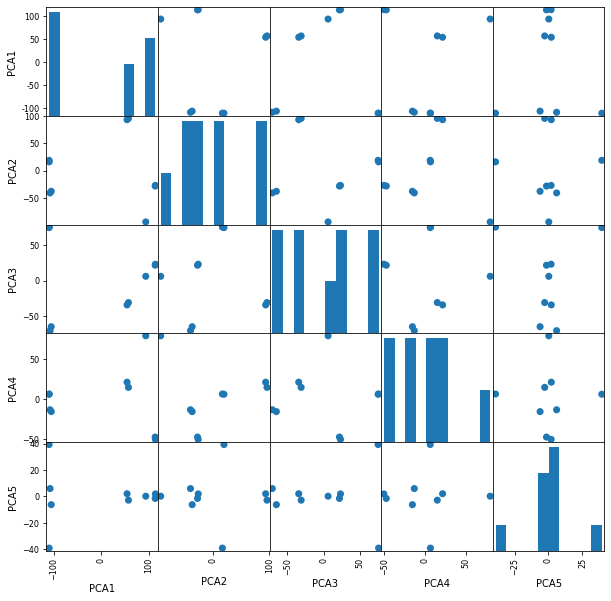

In [11]:
pd.plotting.scatter_matrix(pd.DataFrame(model.transform(data)[:, :5]
                                        , columns=[f"PCA{i}"for i in range(1, 6)])
                           , figsize=(10, 10)
                           , s=200
                           , alpha=1)
plt.savefig('scatterfig.png',)

In [14]:
pd.DataFrame(model.transform(data)[:, :5]
             , columns=[f"PCA{i}"for i in range(1, 6)]
             ,index=data.index
            ).to_csv("PCAed_data.csv", index=True)